In [126]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import json
from pathlib import Path

load_dotenv()

True

In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [128]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [129]:
from collections import Counter
from nltk import ngrams

In [130]:
import spacy
from spacy import displacy

In [131]:
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))

#Added custom Stop Words because they were the most common Ngrams and are most likley referreing to a photo
    sw_addon = {"file", "photo"}

    regex = re.compile("[^a-zA-Z ]")

    re_clean = regex.sub(' ', text)

    words = word_tokenize(re_clean)

    lem = [lemmatizer.lemmatize(word) for word in words]

    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]

    return output

In [132]:
lemmatizer = WordNetLemmatizer()

In [133]:
key = os.getenv("financial_modeling_key")

In [134]:
company = "F"

news = requests.get(f"https://financialmodelingprep.com/api/v3/stock_news?tickers={company}&limit=150&apikey={key}").json()
news_df = pd.DataFrame(news)

news_filter = news_df[['symbol', 'publishedDate',"title","site","text"]]

In [135]:
news_df[1:15]

,symbol,publishedDate,title,image,site,text,url
1,F,2021-05-21 18:09:31,"Final Trades: MSGE, F, BHP & SONO",https://cdn.snapi.dev/images/v1/8/i/8ifj2222-8...,CNBC Television,"The final trades of the week, with CNBC's Meli...",https://www.youtube.com/watch?v=eMgQgsTeSxg
2,F,2021-05-21 18:04:06,Monster truck rally — Did Ford just win the EV...,https://cdn.snapi.dev/images/v1/f/9/f9d222-836...,CNBC Television,So did Ford just leave the other electric vehi...,https://www.youtube.com/watch?v=1qbWESEpVMY
3,F,2021-05-21 18:02:24,"4 Top Stock Trades for Monday: F, NVDA, FL, SPCE",https://cdn.snapi.dev/images/v1/y/6/best-stock...,InvestorPlace,"Ford, Nvidia, Foot Locker and Virgin Galactic ...",https://investorplace.com/2021/05/4-top-stock-...
4,F,2021-05-21 17:25:00,"Market Extra: Ford Motor, Enphase lead S&P 500...",https://cdn.snapi.dev/images/v1/j/y/these-are-...,Market Watch,The S&P 500 finished Friday trade with losses ...,https://www.marketwatch.com/story/ford-motor-e...
5,F,2021-05-21 16:00:52,"Stock Market Rally Still Hard To Handle; ASML,...",https://cdn.snapi.dev/images/v1/r/g/ao12we22-h...,Investors Business Daily,"Stock market rally still hard to handle; ASML,...",https://www.youtube.com/watch?v=-PUQiw6ohHo
6,F,2021-05-21 15:57:04,Ford extends 2-day rally to 11% after revealin...,https://cdn.snapi.dev/images/v1/f/o/ford-exten...,Business Insider,Ford stock extended its two-day rally to as mu...,https://www.businessinsider.com/ford-stock-pri...
7,F,2021-05-21 15:47:04,Sunrun (RUN) Joins Ford to Supply Reliable Bac...,https://cdn.snapi.dev/images/v1/s/s/auto33-836...,Zacks Investment Research,Sunrun (RUN) partners with Ford to install F-1...,https://www.zacks.com/stock/news/1585202/sunru...
8,F,2021-05-21 15:43:49,A Transportation ETF Accelerates on Ford's New...,https://cdn.snapi.dev/images/v1/y/1/urlhttps3a...,ETF Trends,A transportation sector-related exchange trade...,https://www.etftrends.com/a-transportation-etf...
9,F,2021-05-21 14:01:33,Here's Why Ford Stock Is Racing Higher Today,https://cdn.snapi.dev/images/v1/f/l/m02d201912...,Benzinga,Ford Motor Company (NYSE:F) shares are trading...,https://www.benzinga.com/trading-ideas/long-id...
10,F,2021-05-21 13:52:00,Why Ford Motor Company Stock Is Charging Highe...,https://cdn.snapi.dev/images/v1/7/b/104275072-...,The Motley Fool,Ford is taking lots of reservations for the el...,https://www.fool.com/investing/2021/05/21/why-...


In [136]:
vader = SentimentIntensityAnalyzer()

f = lambda text: vader.polarity_scores(text)["compound"]
news_filter["compound"] = news_filter["text"].apply(f)

text_score = news_filter[["symbol", "publishedDate", "compound"]]
text_score["publishedDate"] = pd.to_datetime(title_score.publishedDate).dt.date

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
text_score

,symbol,publishedDate,compound
0,F,2021-05-22,0.7003
1,F,2021-05-21,0.0000
2,F,2021-05-21,-0.0516
3,F,2021-05-21,0.2023
4,F,2021-05-21,-0.1531
...,...,...,...
145,F,2021-04-28,0.4215
146,F,2021-04-28,0.7650
147,F,2021-04-27,0.0000
148,F,2021-04-27,-0.2960


In [138]:
mean_df = text_score.groupby(["symbol", "publishedDate"]).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound", axis="columns").transpose()
mean_df.head()

symbol,F
publishedDate,
2021-04-27,0.007400
2021-04-28,0.248426
2021-04-29,-0.181554
2021-04-30,0.000000
2021-05-03,0.151917


In [139]:
news_filter["tokens"] = news_filter["text"].apply(tokenizer)

In [140]:
processed_txt = news_filter.tokens
stock_ngrams = [item for sublist in news_filter["tokens"].to_list() for item in sublist]
stock_bigrams = Counter(ngrams(stock_ngrams, n=4))
stock_bigrams.most_common(20)

[(('ford', 'motor', 'company', 'nyse'), 13),
 (('motor', 'company', 'nyse', 'f'), 13),
 (('electric', 'f', 'lightning', 'pickup'), 7),
 (('f', 'lightning', 'electric', 'pickup'), 4),
 (('ford', 'motor', 'company', 'f'), 4),
 (('ford', 'motor', 'co', 'nyse'), 4),
 (('motor', 'co', 'nyse', 'f'), 4),
 (('f', 'lightning', 'electric', 'truck'), 3),
 (('watch', 'berkshire', 'hathaway', 'annual'), 3),
 (('berkshire', 'hathaway', 'annual', 'shareholders'), 3),
 (('hathaway', 'annual', 'shareholders', 'meeting'), 3),
 (('annual', 'shareholders', 'meeting', 'youtube'), 3),
 (('shareholders', 'meeting', 'youtube', 'https'), 3),
 (('meeting', 'youtube', 'https', 'youtu'), 3),
 (('youtube', 'https', 'youtu', 'gx'), 3),
 (('https', 'youtu', 'gx', 'ozwhpm'), 3),
 (('youtu', 'gx', 'ozwhpm', 'k'), 3),
 (('new', 'electric', 'f', 'lightning'), 3),
 (('lightning', 'electric', 'pickup', 'truck'), 3),
 (('stock', 'price', 'ford', 'motor'), 3)]

In [141]:
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [142]:
stock_top10_words = token_count(stock_ngrams)

all_news = " ".join(news_filter["text"].to_list())

<AxesSubplot:xlabel='publishedDate'>

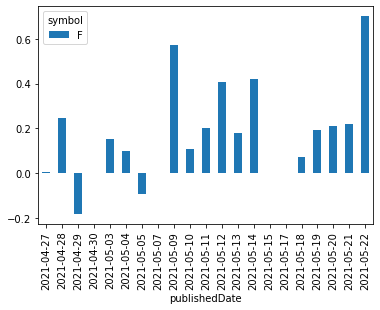

In [143]:
mean_df.plot(kind="bar")

In [147]:
mean_df['good_sentiment'] = np.where(mean_df["F"] > .5, "1", "0")
mean_df['bad_sentiment'] = np.where(mean_df["F"] < -.1, "-1", "0")
mean_df.head()

symbol,F,good_sentiment,bad_sentiment
publishedDate,,,
2021-04-27,0.007400,0,0
2021-04-28,0.248426,0,0
2021-04-29,-0.181554,0,-1
2021-04-30,0.000000,0,0
2021-05-03,0.151917,0,0


In [146]:
nlp = spacy.load('en_core_web_sm')

stock_ner = nlp(all_news)

stock_ner.user_data["title"] = "Stock NER"

displacy.render(stock_ner, style = "ent")